In [306]:
import numpy as np

In [307]:
k = 0.03
rho = 1300
C = 650
kappa = k/(rho*C)

In [102]:
T0 = -42

In [265]:
'''
Diurnal (Sols)
a_d: deg C
per_d: seconds
delta_d: meters
'''
a_d = 36 
per_d = 88642.663
delta_d = np.sqrt(kappa*per_d/np.pi)

In [266]:
'''
Yearly (Seasonal)
a_y: deg C
per_y: seconds
delta_y: meters
'''
a_y = 11
per_y = 668.5991*per_d
delta_y = np.sqrt(kappa*per_y/np.pi)

In [267]:
# Estimated Heat Flux [W/m^2]
q = 0.031

In [268]:
'''
Insight Numbers
zmin: first thermistor depth [m]
zmax: last thermistor depth [m]
step: even thermistor spacing
z: meters

tmax: Mars year [s]
t: seconds
'''

zmin = 0.50
zmax = 4.5
step = (zmax-zmin)/14
z = np.arange(zmin,zmax,step)
z = np.append(z,zmax)

tmax = per_y
t = np.arange(0,tmax,per_d)

In [269]:
# meshgrid deletes last row (14,669)
# Matlab meshgrid (15,669)
tt,zz = np.meshgrid(t,z)

In [270]:
# Calculate steady temperature field T(z)
T1_steady = T0 + (q/k)*z
T2_steady = T0 + (q/k)*zz

In [271]:
# Calculate oscillatory temperature field T(t,z)
T2_osc = a_y*np.exp(-zz/delta_y)*np.cos(2*np.pi*tt/per_y - zz/delta_y) +\
        a_d*np.exp(-zz/delta_d)*np.cos(2*np.pi*tt/per_d - zz/delta_d)

In [272]:
# Calculate T(t,z): z rows by t columns
T2d = T2_steady + T2_osc

In [167]:
TMean = [np.mean(T2d[i,:]) for i in range(0,len(T2d))]

Text(0.5,0.98,'Midterm; David J.')

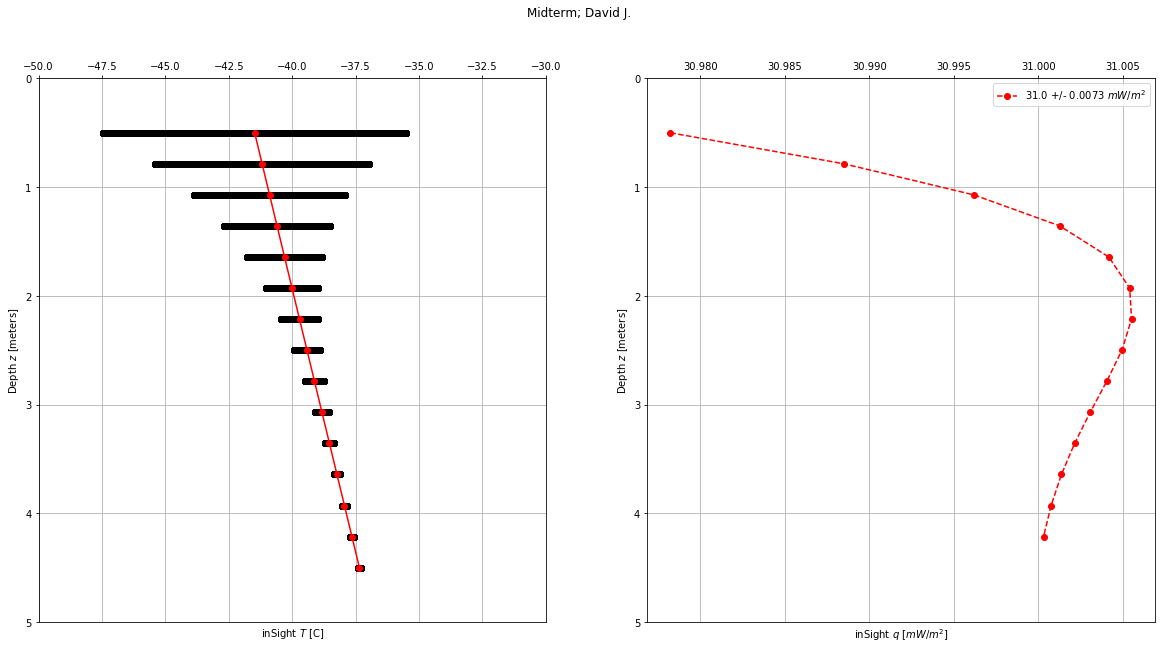

In [185]:
# creating figure for subplots
fig,((ax1),(ax2)) = plt.subplots(1,2,figsize=(20,10))

# looping through to plot temperature vs distance raw points
for i in range(0,len(t)):
    if(i == 0):
        ax1.plot(T2d[:,i],z,'ok')
    else:
        ax1.plot(T2d[:,i],z,'ok')
        
# plotting mean values over raw points 
ax1.plot(TMean,z,'-or')

# Setting up for subplot 2
# creating z list deleting last element
q_year = [i for i in z]
del q_year[-1]
# creating temp list deleting last element
q_t = [i for i in TMean]
del q_t[-1]

# evaluating values using Fourier's Law
fourier = k*(TMean[-1] - q_t)/(z[-1] - q_year)

# plotting flux in subplot 2
current_label = r'%2.1f +/- %5.4f $mW/m^2$' %\
(1000*np.mean(fourier), 1000*np.std(fourier))
ax2.plot(1000*fourier,q_year,'r--o',label=current_label)

# configuration for subplot 1
ax1.axis([-50,-30,5,0])
ax1.set_ylabel(r'Depth $z$ [meters]')
ax1.set_xlabel(r'inSight $T$ [C]')
ax1.xaxis.set_ticks_position('top')
ax1.grid(True)

# configuration for subplot 2
ax2.set_ylim(5,0)
ax2.set_ylabel(r'Depth $z$ [meters]')
ax2.set_xlabel(r'inSight $q$ [$mW/m^2$]')
ax2.xaxis.set_ticks_position('top')
ax2.grid(True)
ax2.legend()

fig.suptitle('Midterm; David J.')

# Midterm Open Questions
- Why is there systematic trend in the q(z) values? What controls this trend?
- And what would happen to q if random noise was (realistcally) included in this synthetic data set?

# Problem 1
1. Make Plots to determine how the systematic trend in q(z) is affected by
    - Changing the amplitude of the daily thermal wave
    - Changing the amplitude of the sesonal thermal wave
    - Increasing the number of temperature measurements made per day
2. At $24 \frac{samples}{day}$, to what degree will such trends affect the inSight mission q measurements?

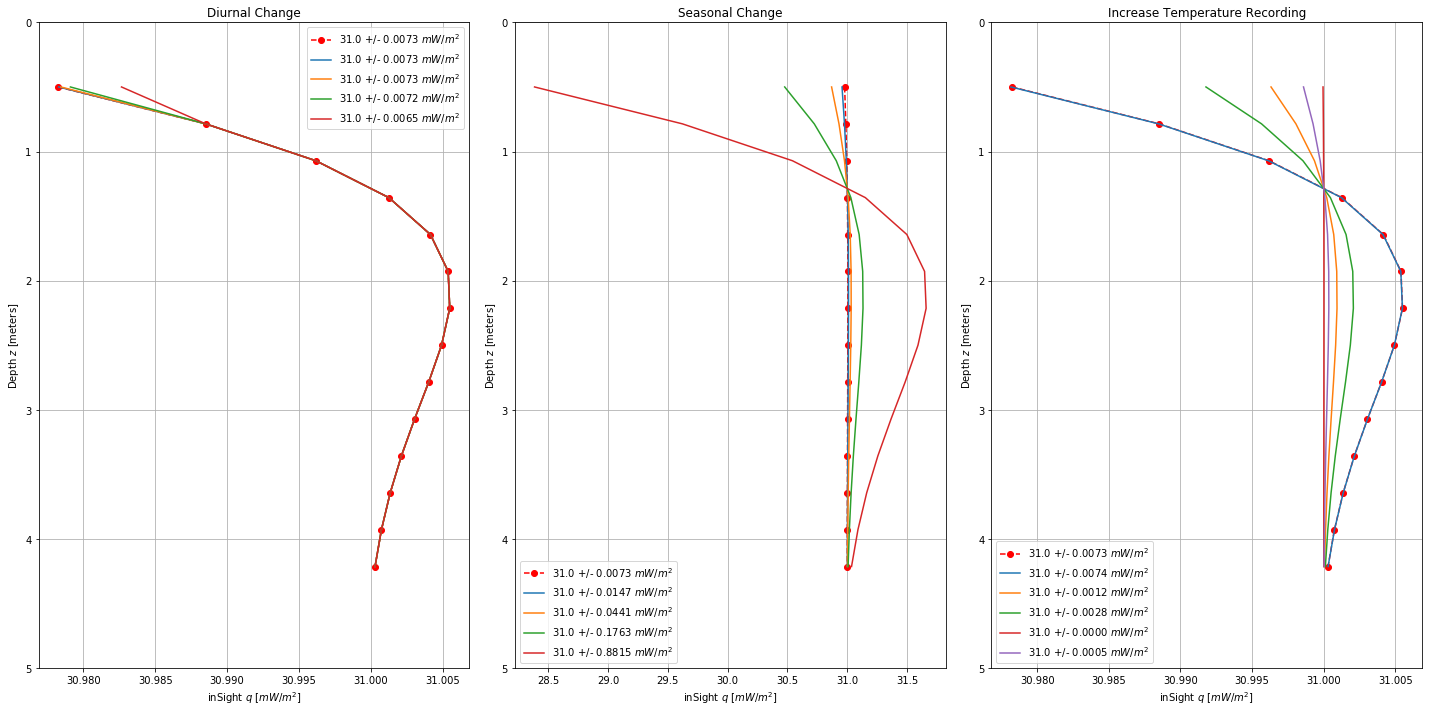

In [261]:
# creating figure for subplots
fig2,((ax1),(ax2),(ax3)) = plt.subplots(1,3,figsize=(20,10))

fourier0 = fourier

current_label = r'%2.1f +/- %5.4f $mW/m^2$' %\
(1000*np.mean(fourier), 1000*np.std(fourier))
ax1.plot(1000*fourier,q_year,'r--o',label=current_label)
ax2.plot(1000*fourier,q_year,'r--o',label=current_label)
ax3.plot(1000*fourier,q_year,'r--o',label=current_label)

for i in range(2,6):
    a_d *= i
    
    T2_osc = a_y*np.exp(-zz/delta_y)*np.cos(2*np.pi*tt/per_y - zz/delta_y) +\
        a_d*np.exp(-zz/delta_d)*np.cos(2*np.pi*tt/per_d - zz/delta_d)
    T2dd = T2_steady + T2_osc
    TMean = [np.mean(T2dd[j,:]) for j in range(0,len(T2dd))]
    
    q_t = [j for j in TMean]
    del q_t[-1]
    fourierd = k*(TMean[-1] - q_t)/(z[-1] - q_year)
    
    current_label = r'%2.1f +/- %5.4f $mW/m^2$' %\
    (1000*np.mean(fourierd), 1000*np.std(fourierd))
    ax1.plot(1000*fourierd,q_year,label=current_label)

a_d = 36 

for i in range(2,6):
    a_y *= i
    
    T2_osc = a_y*np.exp(-zz/delta_y)*np.cos(2*np.pi*tt/per_y - zz/delta_y) +\
        a_d*np.exp(-zz/delta_d)*np.cos(2*np.pi*tt/per_d - zz/delta_d)
    T2dy = T2_steady + T2_osc
    TMean = [np.mean(T2dy[j,:]) for j in range(0,len(T2dy))]
    
    q_t = [j for j in TMean]
    del q_t[-1]
    fouriery = k*(TMean[-1] - q_t)/(z[-1] - q_year)
    
    current_label = r'%2.1f +/- %5.4f $mW/m^2$' %\
    (1000*np.mean(fouriery), 1000*np.std(fouriery))
    ax2.plot(1000*fouriery,q_year,label=current_label)
    
a_y = 11

for i in range(2,6):
    t = np.arange(0,tmax,per_d/i)
    tt,zz = np.meshgrid(t,z)
    
    T2_steadyt = T0 + (q/k)*zz
    T2_osct = a_y*np.exp(-zz/delta_y)*np.cos(2*np.pi*tt/per_y - zz/delta_y) +\
        a_d*np.exp(-zz/delta_d)*np.cos(2*np.pi*tt/per_d - zz/delta_d)
    T2dt = T2_steadyt + T2_osct
    TMean = [np.mean(T2dt[j,:]) for j in range(0,len(T2dt))]
    
    q_t = [j for j in TMean]
    del q_t[-1]
    fouriert = k*(TMean[-1] - q_t)/(z[-1] - q_year)
    
    current_label = r'%2.1f +/- %5.4f $mW/m^2$' %\
    (1000*np.mean(fouriert), 1000*np.std(fouriert))
    ax3.plot(1000*fouriert,q_year,label=current_label)
    if(i == 5):
        t = np.arange(0,tmax,per_d/24)
        tt,zz = np.meshgrid(t,z)
        
        T2_steadyt = T0 + (q/k)*zz
        T2_osct = a_y*np.exp(-zz/delta_y)*np.cos(2*np.pi*tt/per_y - zz/delta_y) +\
        a_d*np.exp(-zz/delta_d)*np.cos(2*np.pi*tt/per_d - zz/delta_d)
        T2dt = T2_steadyt + T2_osct
        TMean = [np.mean(T2dt[j,:]) for j in range(0,len(T2dt))]
        
        q_t = [j for j in TMean]
        del q_t[-1]
        fouriert = k*(TMean[-1] - q_t)/(z[-1] - q_year)
        
        current_label = r'%2.1f +/- %5.4f $mW/m^2$' %\
        (1000*np.mean(fouriert), 1000*np.std(fouriert))
        ax3.plot(1000*fouriert,q_year,'k--*',label=current_label)

ax1.set_ylim(5,0)
ax1.set_ylabel(r'Depth $z$ [meters]')
ax1.set_xlabel(r'inSight $q$ [$mW/m^2$]')
ax1.set_title('Diurnal Change')
ax1.grid(True)
ax1.legend()

ax2.set_ylim(5,0)
ax2.set_ylabel(r'Depth $z$ [meters]')
ax2.set_xlabel(r'inSight $q$ [$mW/m^2$]')
ax2.set_title('Seasonal Change')
ax2.grid(True)
ax2.legend()

ax3.set_ylim(5,0)
ax3.set_ylabel(r'Depth $z$ [meters]')
ax3.set_xlabel(r'inSight $q$ [$mW/m^2$]')
ax3.set_title('Increase Temperature Recording')
ax3.grid(True)
ax3.legend()

plt.tight_layout()

### Remarks
From the plots, one can see that the diurnal change has a minimal effect on q(z). However, the seasonal change and temperature increase have charts that differ a lot more.
1. For the seasonal change, this make sense. From an intuitive stand point, the seasons have a larger affect on the weather pattern, and from the equation the values having to do with seasons are much larger and affect the equation to a greater degree.
2. Increasing temperature recording also had an effect on the q(z)

# Problem 2
1. For our estimates of Martian conditions, make a plot showing how much random noise (as formulated in the Midterm Key) can be added to the system without compromising the q measurements.
    - Determine for what noise amplitude (if any) the measured heat flux departs from the known value by > 20%
    - With estimates of 6.5 milliKelvin variations on their thermistors, is noise likely to be an issue for the inSight mission?

Text(0.5,0,'inSight $q$ [$mW/m^2$]')

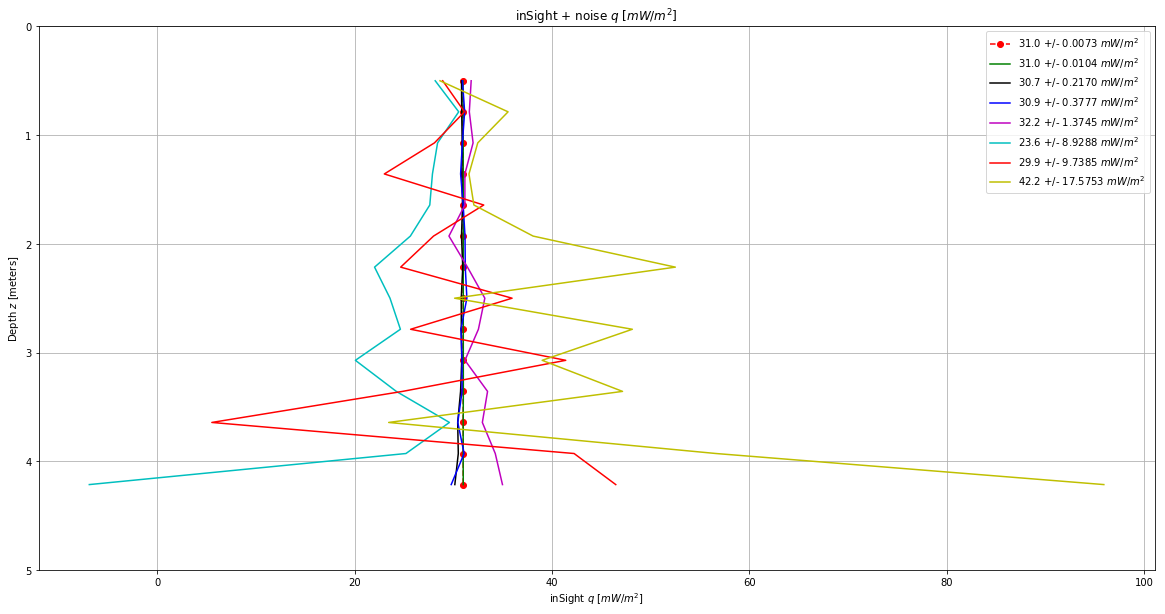

In [305]:
styles = ['r--o','g','k','b','m','c','r','y']
fig3 = plt.figure(figsize=(20,10))
for i in range(0,8):
    noise = i**4*0.0065*np.random.randn(len(T2d),len(T2d[0]))
    T2dn = T2d + noise
    
    TnMean = [np.mean(T2dn[i,:]) for i in range(0,len(T2dn))]
    
    q_year = [i for i in z]
    del q_year[-1]
    
    q_t = [i for i in TnMean]
    del q_t[-1]
    
    fouriern = k*(TnMean[-1] - q_t)/(z[-1] - q_year)
    
    current_label = r'%2.1f +/- %5.4f $mW/m^2$' %\
    (1000*np.mean(fouriern), 1000*np.std(fouriern))
    plt.plot(1000*fouriern,q_year,styles[i],label=current_label)

plt.legend()
plt.grid(True)
plt.title(r'inSight + noise $q$ [$mW/m^2$]')
plt.ylim(5,0)
plt.ylabel(r'Depth $z$ [meters]')
plt.xlabel(r'inSight $q$ [$mW/m^2$]')

### Remarks
1. The heat flux departs from the know at around $0.0065*5^4 = 4.0625 K$. This can be seen by the blue curve on the plot. Furthermore, the standard deviation is much higher showing that values are changing a lot more leading to even more error.
2. Estimates of 6.5 milliKelvin, should not be a problem since with the noise the q stayed consistent and the standard deviation only went out by about .003.